In [1]:
import pandas as pd
import seaborn as sns
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# from copy import deepcopy
# from scipy import stats
# from scipy.stats import chisquare

In [2]:
grades = pd.read_csv('original_data/grades_numeric.csv')

In [3]:
ego_ids = pd.DataFrame(grades.egoid.value_counts()) 
ego_ids.reset_index(level=0, inplace=True) 
ego_ids = ego_ids.sort_values(by='egoid', ascending=False).head(20) 
ego_ids.columns = ('egoid', 'size')
ego_ids

,egoid,size
0,57325,65
1,73918,64
2,22138,59
3,15181,56
4,63138,56
5,14571,55
6,39146,55
7,82986,55
8,63904,55
9,63347,54


<AxesSubplot:xlabel='AcademicPeriod', ylabel='count'>

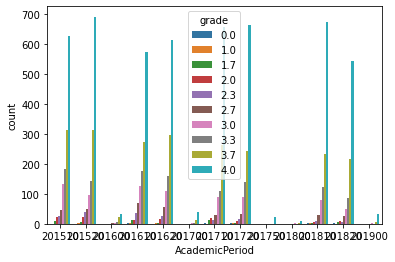

In [4]:
sns.countplot(x="AcademicPeriod", hue="grade", data=grades) 

In [5]:
print(len(grades.course.unique()))
print(len(grades.grade.unique()))
print(len(grades.AcademicPeriod.unique()))

4140
10
13


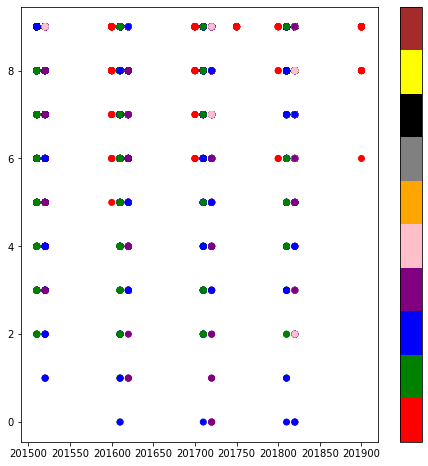

In [6]:
x = (grades.AcademicPeriod.astype(int)).tolist()
y = grades.grade.tolist()
z = (grades.course.astype(int)).tolist()

T = (np.array(y)).reshape(-1,1)
encoder = OrdinalEncoder()
encoder.fit(T)
T_encoded = encoder.transform(T)

colors = ['red','green','blue','purple', 'pink', 'orange','grey', 'black', 'yellow', 'brown']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, T_encoded, c=z, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(T_encoded),max(T_encoded)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

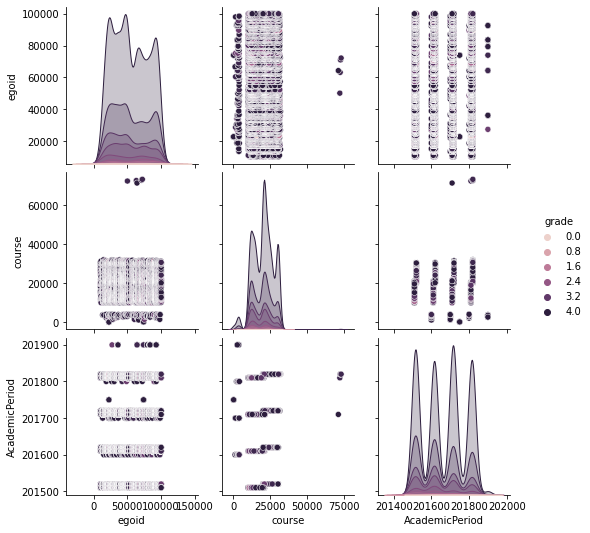

In [8]:
sns.pairplot(grades, hue='grade')